<a href="https://colab.research.google.com/github/haanhduc2002/bankcustomerprediction/blob/main/Asm3BusinessAnalyticsPythonVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About the dataset**


A telemarketer will call potential customers to ask them to buy a product or service using the
engaging direct marketing method known as telemarketing. Direct marketing, sometimes
referred to as database marketing, is a sort of marketing that uses customer information
stored in a database to spot chances for further services. The old targeted customers for
telemarketing who are more likely to subscribe to a long-term deposit would lower marketing
costs. It is possible to develop and use automated systems for customers through customer
data. By following this technique, banks will cut down on costs and conduct fewer but more
effective phone calls.

In [ ]:
#install scikeras
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import the libraries
import  pandas as pd
import numpy as np
import requests
import panel as pn
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import  cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from scikeras.wrappers import KerasClassifier

from sklearn.metrics import classification_report

In [ ]:
#download the dataset to session
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

--2023-05-12 01:49:31--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip’

bank-additional.zip 100%[===================>] 434.15K   667KB/s    in 0.7s    

2023-05-12 01:49:32 (667 KB/s) - ‘bank-additional.zip’ saved [444572/444572]



In [ ]:
#unzip the file
!unzip bank-additional.zip
!ls

Archive:  bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/._bank-additional  
bank-additional  bank-additional.zip  __MACOSX	sample_data


**Objective of the project:**

- Identify variables that contribute to the target variable y
- Predict customer who choose to subscribe to the service and who are not with over 80% accuracy
- Predict customer who agree to the term with over 50% accuracy

In [ ]:
# cache data to improve notebool performance
if 'data' not in pn.state.cache.keys():
    df = pd.read_csv("bank-additional/bank-additional-full.csv", ';')
    pn.state.cache['data'] = df.copy()
else:
    df = pn.state.cache['data']

<ipython-input-5-77b97ac1ee65>:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv("bank-additional/bank-additional-full.csv", ';')


**Preforming data exploration:**
- Identify data type, summary of the dataset
- Remove na from the dataset if exist
- Convert all field to correct datatype
- Visualize using pair charts, histogram, bar plot
- Perform Linear Regression on the numeric variables and Chi-Square test on categorical variables
- Remove insignificant variables or records

In [ ]:
# Examining the datasets
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Explore dtypes and number of non-null records in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# Convert object dtype columns to category
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).astype('category')

In [ ]:
# Examine the dimention of the dataset
df.shape

(41188, 21)

In [ ]:
# Examine number of 'unknown' values in the dataset
df.eq('unknown').sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [ ]:
# Explore the dataset statitics
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
# Create a function to visualize the data distribution
def plot_frequency_histogram (x: pd.Series ):
  import matplotlib.pyplot as pltp
  %matplotlib inline
  pltp.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
  # Plot Histogram on x
  pltp.hist(x, bins=50)
  pltp.xticks(rotation = 45)
  pltp.gca().set(title='Frequency Histogram', ylabel='Frequency', xlabel = x.name);

===================== AGE ==================================================================

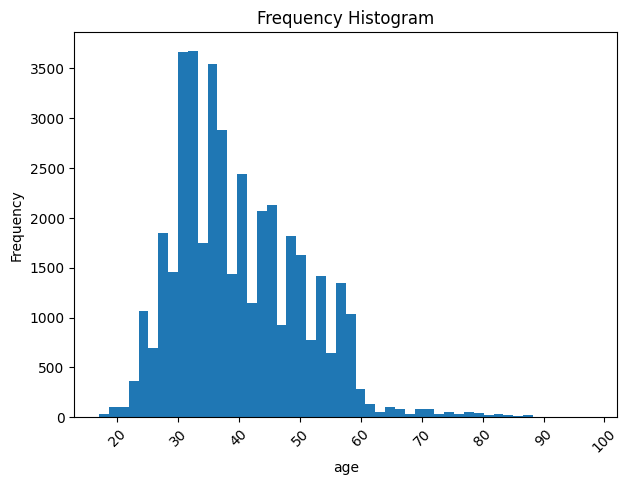

In [ ]:
# Visualize the age distribution
plot_frequency_histogram(df["age"])

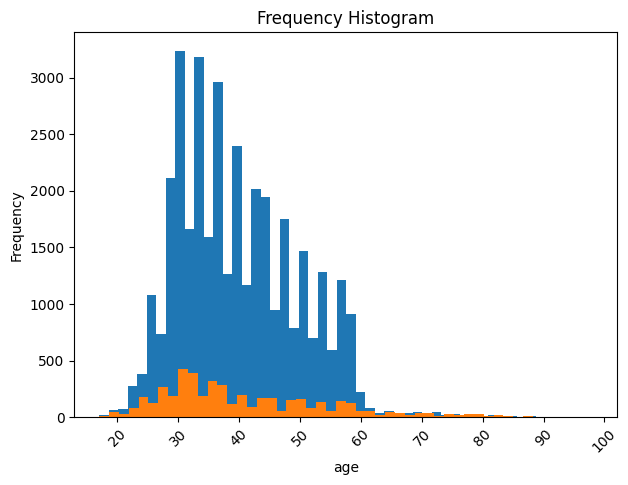

In [ ]:
# Visualize the age distribution no response
plot_frequency_histogram(df.loc[df['y'] == "no","age"])
# Visualize the age distribution of yes response
plot_frequency_histogram(df.loc[df['y'] == "yes","age"])

We can see that most of the call are made to people who are at the age of 30-60. As the customer age are likely to increase above the max value, it is decided that age is converted to a categorical variable with 3 category including :
- Below 30
- 30-60
- Over 60

=========== DURATION =======================================

The duration field will be eliminated as provided in the dataset description. Only when the call concluded and the target variable y was known could the duration of the call be determined. Despite having a strong correlation with the goal value, the variable must be excluded in order to have a realistic model

========== CAMPAIGN ==============================

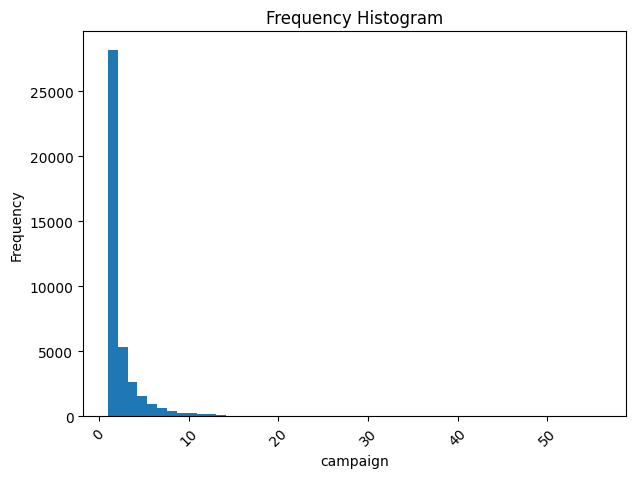

In [ ]:
# Visualize the campaingn data distribution
plot_frequency_histogram(df["campaign"])

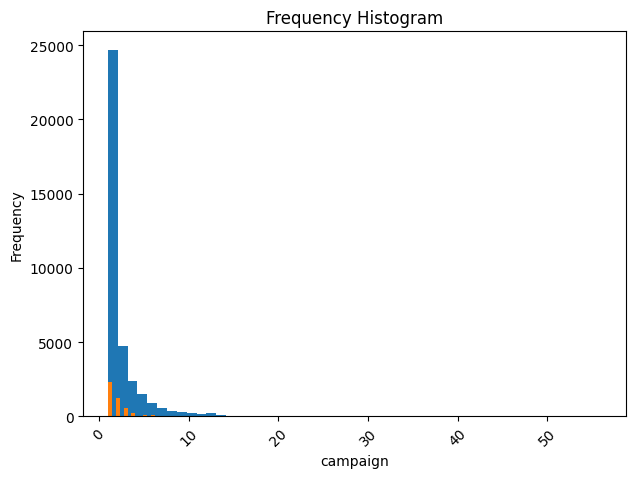

In [ ]:
# Visualize the campaingn data distribution
plot_frequency_histogram(df.loc[df['y'] == "no","campaign"])
# Visualize the campaingn data distribution of yes response
plot_frequency_histogram(df.loc[df['y'] == "yes","campaign"])

From the histograms, it is likely that if more calls are made to the customers during the campaign the less likely that they will subscribe to a term deposit. The campaign is considered a significant variable to the target variable and it should remain in the dataset.

======== PDAYS ================================

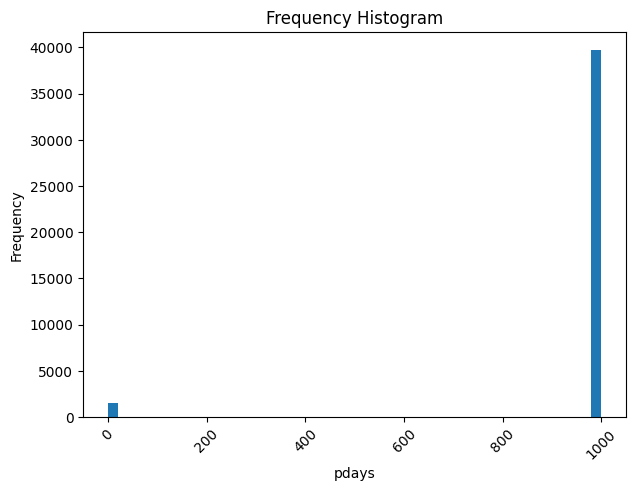

In [ ]:
# Visualize the data distribution
plot_frequency_histogram(df["pdays"])

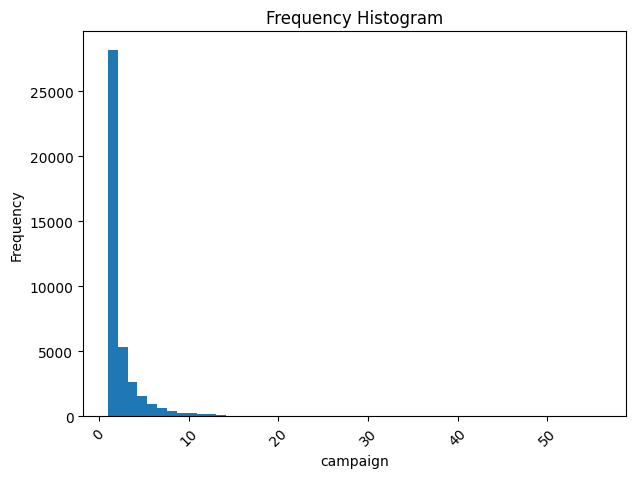

In [ ]:
# Visualize the data distribution without the value 999
plot_frequency_histogram(df.loc[df['campaign'] != 999,"campaign"])

The value 999, which means that the client was not previously contacted, accounts for a large portion of the data while most of the clients are previously contacted in no more than 20 days. We decided to create a dummy using this variable. The dummy variable will show
whether the customers were previously contacted during the campaign

========== PREVIOUS =============================

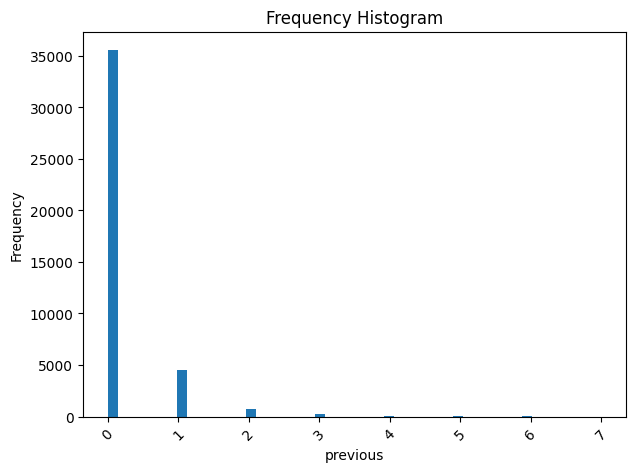

In [ ]:
# Visualize the data distribution
plot_frequency_histogram(df["previous"])

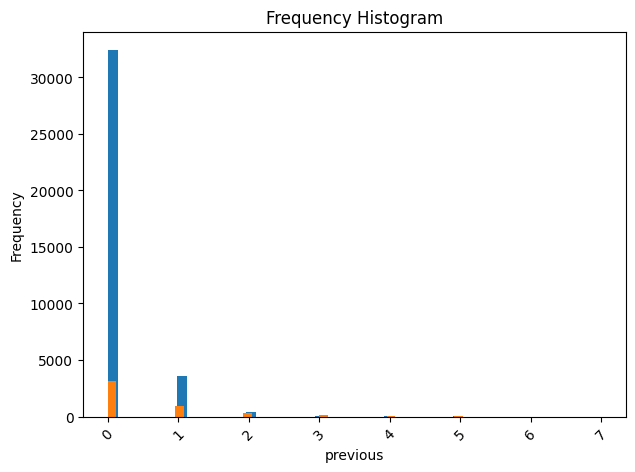

In [ ]:
# Visualize the data distribution in relation to the response
plot_frequency_histogram(df.loc[df['y'] == "no","previous"])

plot_frequency_histogram(df.loc[df['y'] == "yes","previous"])

======= SOCIAL ATTRIBUTES ===============================

In [ ]:
# Run correlation analysis on the numerical attributes
df.corr(method='pearson', min_periods=1)

<ipython-input-21-eec66e702492>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson', min_periods=1)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


<ipython-input-22-d9bd8bb5f382>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson', min_periods=1))


<Axes: >

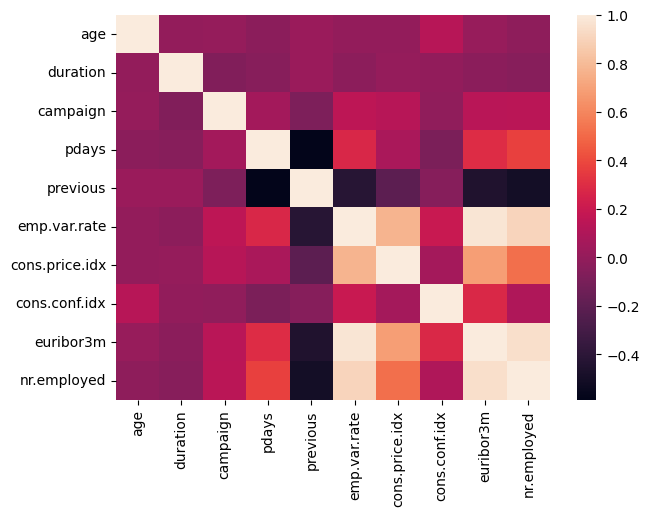

In [ ]:
sns.heatmap(df.corr(method='pearson', min_periods=1))

When examining the correlation between the numerical variable and our correlation matrix shows that there are 3 pairs of variables that have high collinearity: emp.var.rate -euribor3m, emp.var.rate - nr. employed, nr. employed -euribor3m . The correlation of these relationships is more than 0.90 indicating that the variables are highly correlated and there might be redundant information. It is decided to use a linear regression test to support the decision to remove the variables.

In [ ]:
#Import linear regression model
import statsmodels.api as sm

# Create a dictionary for the responses
response = {'yes' : True,
            'no': False}

# Define response variable
# Replace the yes/no values in the target variable y to 1 and 0
y = [response[item] for item in df.y]

# Define predictor variables
x = df[["age",
        "duration",
        "campaign",
        "pdays",
        "previous",
        "emp.var.rate",
        "cons.price.idx",
        "cons.conf.idx",
        "euribor3m",
        "nr.employed"]]

# Add constant to predictor variables
x = sm.add_constant(x)

# Fit linear regression model
model = sm.OLS(y, x).fit()

# View model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     1966.
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        01:49:38   Log-Likelihood:                -2976.3
No. Observations:               41188   AIC:                             5975.
Df Residuals:                   41177   BIC:                             6070.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.5038      0.932     -0.

The variable euribor3m is removed while the other two variables were kept even though there is a pretty high correlation between them since the regression analysis shows that euribor3m is not statistically significant to the target variable

In [ ]:
# Remove duration and euribor3m variable
df.drop(["duration", "euribor3m"], axis =1 )

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,4963.6,yes


In [ ]:
# Convert age to categorical field
df["age"] = pd.cut(df["age"],
                   bins = [0, 30, 60, np.inf], # create a bins for the categorical columns
                   labels = ["Below 30", "30-60", "Over 60"] #create the labels
                   ).astype('category')

In [ ]:
# Convert pdays to categorical field
df["pdays"] = np.where(df["pdays"] == 999, True, False)

The information from the describe function the numeric variables are not on the same numeric scale so the Z-Score normalization technique is used

In [ ]:
from scipy import stats

# specify columns to normalize
cols_to_normalize = ['campaign', 'previous', "emp.var.rate", "cons.price.idx", "cons.conf.idx", "nr.employed"]

# apply z-score normalization to specified columns
df[cols_to_normalize] = stats.zscore(df[cols_to_normalize])


====== Categorical field =============================

========= Job ==============================

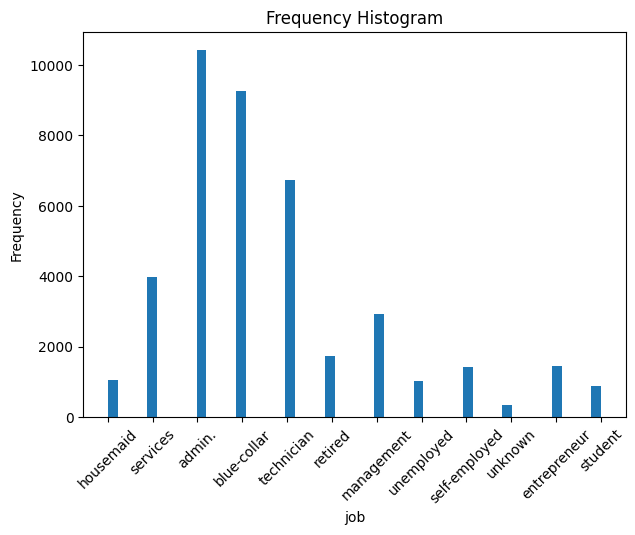

In [ ]:
# Visualize the data distribution
plot_frequency_histogram(df["job"])

In [ ]:
# Display the cross table
pd.crosstab(df['job'], df['y'])

y,no,yes
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


The two most popular jobs in the dataset, according to the bar graph and the table, are admin and blue-collar. The job attribute has 330 "unknown" values. We chose to delete "unknown" values from the job column because they don't reveal much information. We observed that whereas white-collar and blue-collar workers have the lowest subscription rates, students have the highest rates

============= Marital ==============================

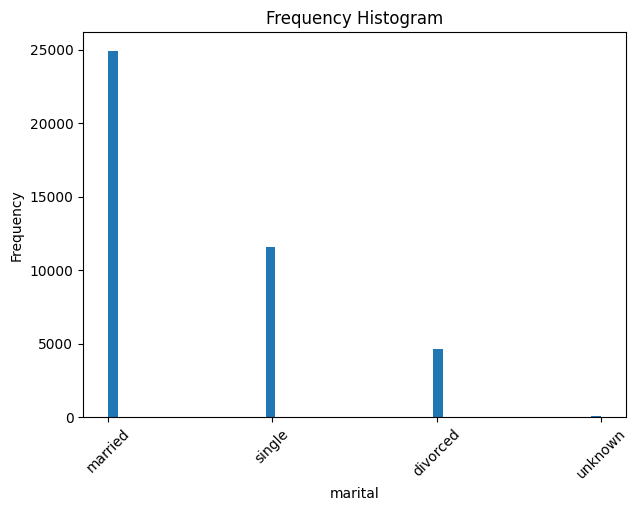

In [ ]:
# Visualize the data distribution
plot_frequency_histogram(df["marital"])

In [ ]:
# Display the cross table
pd.crosstab(df['marital'], df['y'])

y,no,yes
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


Similar to the employment characteristic, the conjugal had 71 "unknown" values that don't provide any useful information, thus we decided to remove the lines that included these attributes.

================== Education ================================

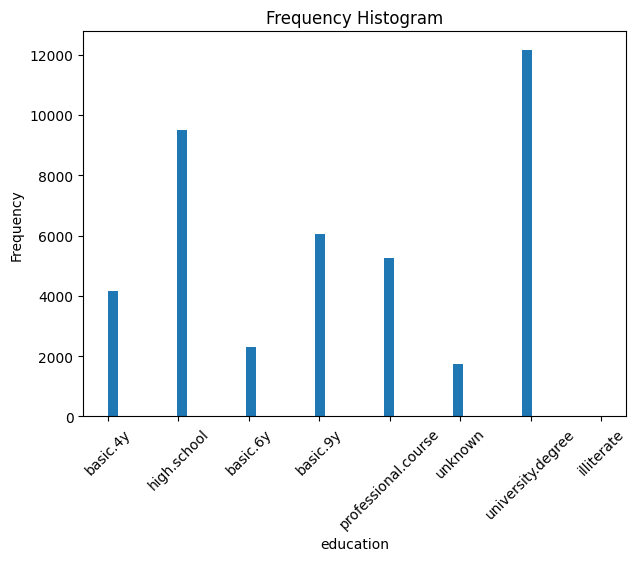

In [ ]:
# Visualize the data distribution
plot_frequency_histogram(df["education"])

In [ ]:
# Display the cross table
pd.crosstab(df['education'], df['y'])

y,no,yes
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


For a statistically meaningful conclusion to be drawn from the bar chart, there are not enough observations (18) of consumers with an "illiterate" education level. Rows with this value will thus be eliminated from the dataset. A term deposit was taken out by 234 of the 1,596 "unknown" observations, or around 5% of the total number of subscribers. Given the imbalance in the dataset, we chose to keep these observations

==================== Default =================================

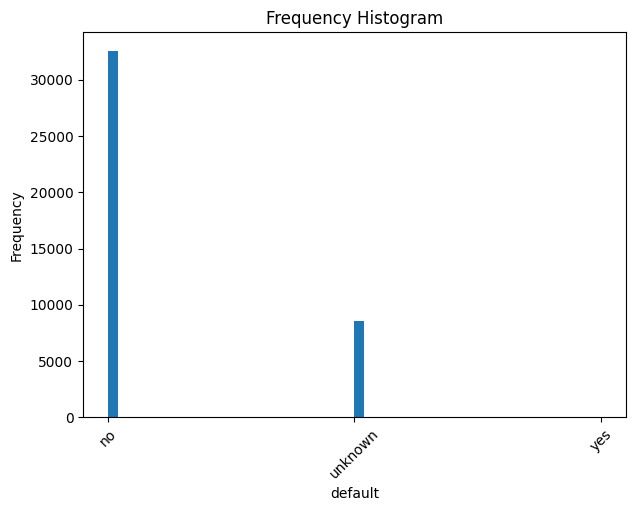

In [ ]:
# Visualize the data distribution
plot_frequency_histogram(df["default"])

In [ ]:
# Display the cross table
pd.crosstab(df['default'], df['y'])

y,no,yes
default,,
no,28391,4197
unknown,8154,443
yes,3,0


The attribute only has 3 “yes” responses recorded while there are 32337 “no” and 8429 “unknown” responses which did not provide any meaningful information. We decided to remove this field from the dataset

================= Housing  and Loan ==================

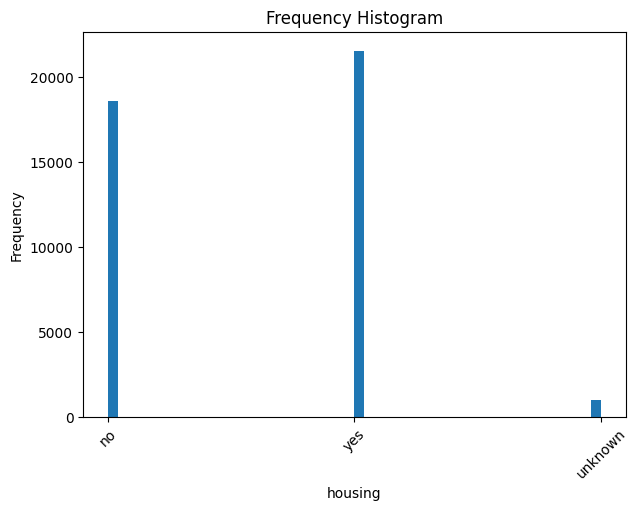

In [ ]:
# Visualize the data distribution
plot_frequency_histogram(df["housing"])

In [ ]:
# Display the cross table
pd.crosstab(df['housing'], df['y'])

y,no,yes
housing,,
no,16596,2026
unknown,883,107
yes,19069,2507


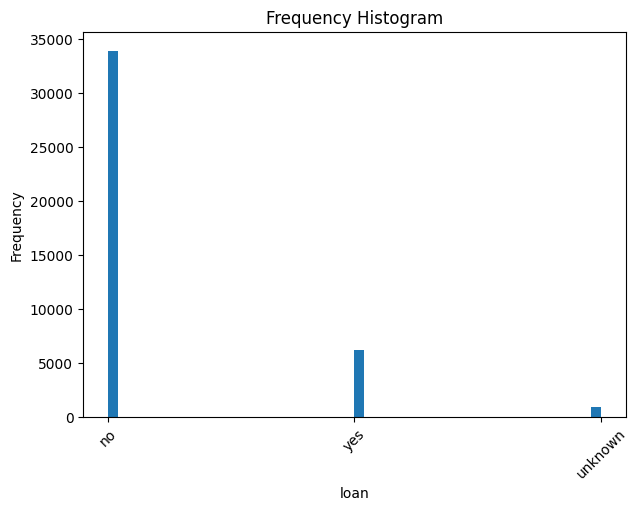

In [ ]:
# Visualize the data distribution
plot_frequency_histogram(df["loan"])

In [ ]:
# Display the cross table
pd.crosstab(df['loan'], df['y'])

y,no,yes
loan,,
no,30100,3850
unknown,883,107
yes,5565,683


=============== Contact =====================================

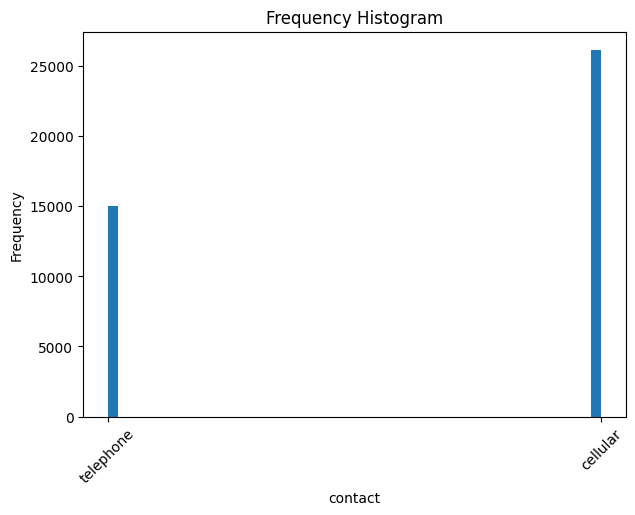

In [ ]:
# Visualize the data distribution
plot_frequency_histogram(df["contact"])

In [ ]:
# Display the cross table
pd.crosstab(df['contact'], df['y'])

y,no,yes
contact,,
cellular,22291,3853
telephone,14257,787


Only 775 out of 14856 respondents using telephones subscribed to a term deposit, compared to 3815 out of 25013 respondents on mobile devices.

============ day_of_week ===========================================

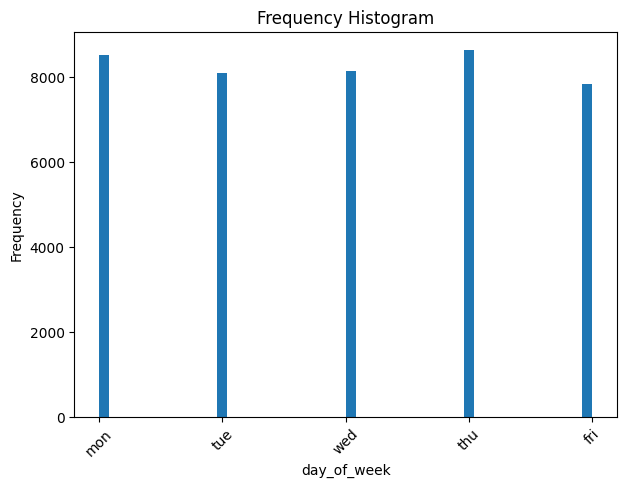

In [ ]:
# Visualize the data distribution
plot_frequency_histogram(df["day_of_week"])

In [ ]:
# Display the cross table
pd.crosstab(df['day_of_week'], df['y'])

y,no,yes
day_of_week,,
fri,6981,846
mon,7667,847
thu,7578,1045
tue,7137,953
wed,7185,949


The calls are made during weekdays and the variations between the number of calls and the number of successful calls were minor. We decided to remove this column from the dataset.

=============== Month ==================================

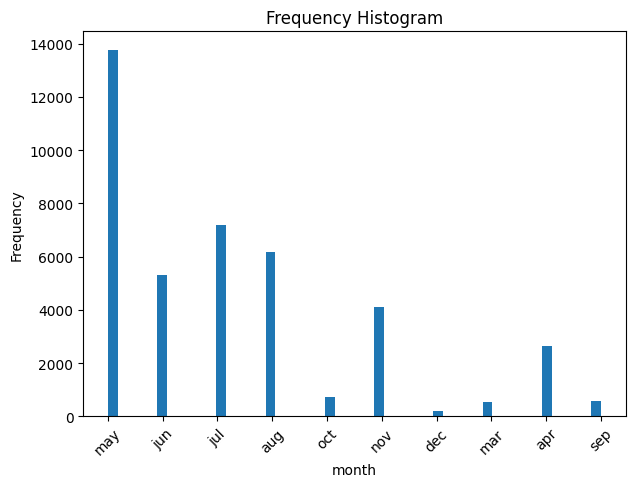

In [ ]:
# Visualize the data distribution
plot_frequency_histogram(df["month"])

In [ ]:
# Display the cross table
pd.crosstab(df['month'], df['y'])

y,no,yes
month,,
apr,2093,539
aug,5523,655
dec,93,89
jul,6525,649
jun,4759,559
mar,270,276
may,12883,886
nov,3685,416
oct,403,315


There was no communication in January, February, or May, which is a busy month because that is when most calls are made. However the months with less contact, like October and December, have high success rates, whereas a busy month, like May, is more likely to get a no.


============== Poutcome ===========================

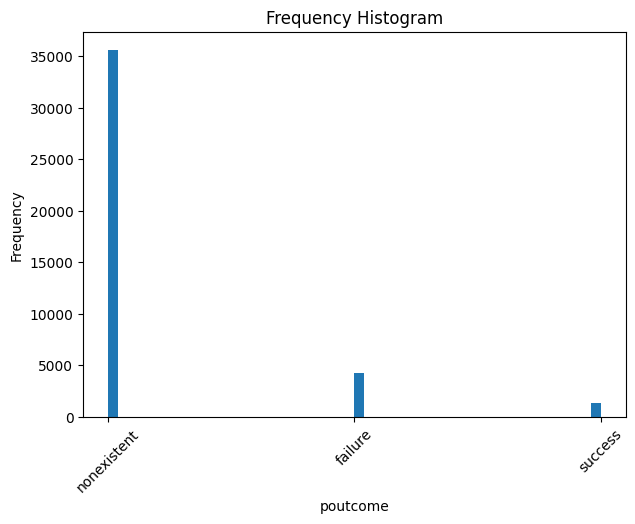

In [ ]:
# Visualize the data distribution
plot_frequency_histogram(df["poutcome"])

In [ ]:
# Display the cross table
pd.crosstab(df['poutcome'], df['y'])

y,no,yes
poutcome,,
failure,3647,605
nonexistent,32422,3141
success,479,894


52.6% of clients who had already signed up for a term deposit following a prior interaction said continue to subscribe. 16.4% who refuse to subscribe in the previous campaign responded positively to the subscription which is more than those who have not been
contacted at 9.6%.We kept this variable because the "poutcome" property provides crucial information about recontacting clients

================ Y =================================

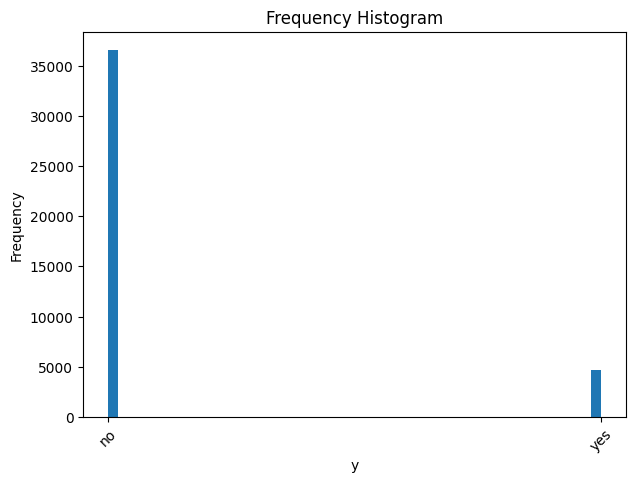

In [ ]:
# Visualize the data distribution
plot_frequency_histogram(df["y"])

In [ ]:
import scipy.stats as stats

# Get list of categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Perform chi-squared test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['y'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Column: {col}\n  chi-square statistic: {chi2}\n  p-value: {p}\n")

Column: age
  chi-square statistic: 1293.1781680479785
  p-value: 1.5485625403876437e-281

Column: job
  chi-square statistic: 961.2424403289555
  p-value: 4.189763287563623e-199

Column: marital
  chi-square statistic: 122.65515182252989
  p-value: 2.068014648442211e-26

Column: education
  chi-square statistic: 193.10590454149565
  p-value: 3.3051890144025054e-38

Column: default
  chi-square statistic: 406.5775146420093
  p-value: 5.1619579513916376e-89

Column: housing
  chi-square statistic: 5.684495858974168
  p-value: 0.05829447669453452

Column: loan
  chi-square statistic: 1.094027551150338
  p-value: 0.5786752870441754

Column: contact
  chi-square statistic: 862.3183642075705
  p-value: 1.5259856523129964e-189

Column: month
  chi-square statistic: 3101.149351411678
  p-value: 0.0

Column: day_of_week
  chi-square statistic: 26.14493907587197
  p-value: 2.9584820052785324e-05

Column: poutcome
  chi-square statistic: 4230.5237978319765
  p-value: 0.0

Column: y
  chi-square 

From the Chi-Square test we are decide to remove two variable: hosing and loan due to their insignificant.

In [ ]:
# Removing housing, loan, day_of_week, default
df.drop(["housing", "loan", "day_of_week", "default"], axis =1 )

,age,job,marital,education,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30-60,housemaid,married,basic.4y,telephone,may,261,-0.565922,True,-0.349494,nonexistent,0.648092,0.722722,0.886447,4.857,0.331680,no
1,30-60,services,married,high.school,telephone,may,149,-0.565922,True,-0.349494,nonexistent,0.648092,0.722722,0.886447,4.857,0.331680,no
2,30-60,services,married,high.school,telephone,may,226,-0.565922,True,-0.349494,nonexistent,0.648092,0.722722,0.886447,4.857,0.331680,no
3,30-60,admin.,married,basic.6y,telephone,may,151,-0.565922,True,-0.349494,nonexistent,0.648092,0.722722,0.886447,4.857,0.331680,no
4,30-60,services,married,high.school,telephone,may,307,-0.565922,True,-0.349494,nonexistent,0.648092,0.722722,0.886447,4.857,0.331680,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,Over 60,retired,married,professional.course,cellular,nov,334,-0.565922,True,-0.349494,nonexistent,-0.752343,2.058168,-2.224953,1.028,-2.815697,yes
41184,30-60,blue-collar,married,professional.course,cellular,nov,383,-0.565922,True,-0.349494,nonexistent,-0.752343,2.058168,-2.224953,1.028,-2.815697,no
41185,30-60,retired,married,university.degree,cellular,nov,189,-0.204909,True,-0.349494,nonexistent,-0.752343,2.058168,-2.224953,1.028,-2.815697,no
41186,30-60,technician,married,professional.course,cellular,nov,442,-0.565922,True,-0.349494,nonexistent,-0.752343,2.058168,-2.224953,1.028,-2.815697,yes


In [ ]:
# Remove 'unknown' records in the job column
df = df[~(df['job'] == 'unknown')]
# Remove 'unknown' records in the marital column
df = df[~(df['marital'] == 'unknown')]
# Remove 'illiterate' records in the education column
df = df[~(df['education'] == 'illiterate')]

For the selected categorical features with n categories, our team utilized one-hot encoding techinique to encode all categorical variables

In [ ]:
# One-hot encode categorical columns only
encoded_df = pd.get_dummies(df, prefix_sep='_', dummy_na=False, drop_first= True, dtype = 'int64').astype('float64')

Data Partition and Sampling

For this dataset the records will be divided into 7-3 for training and testing. Oversampling method will be used on the training dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separate the features and target variable
X = encoded_df.drop('y_yes', axis=1)
y = encoded_df['y_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversample the minority class in the training set using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the shapes of the training and resampled training data
print("Original training data shape:", X_train.shape, y_train.shape)
print("Resampled training data shape:", X_train_resampled.shape, y_train_resampled.shape)

Original training data shape: (32615, 54) (32615,)
Resampled training data shape: (57902, 54) (57902,)


In [ ]:
# define models
svm_model = SVC(kernel='rbf', C=1, gamma='auto')

svm_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

svm_score_mean = svm_scores.mean()

print('SVM mean accuracy:', svm_score_mean)

SVM mean accuracy: 0.9078951402728805


In [ ]:
svm_predictor = svm_model.fit(X_train, y_train)
svm_pred = svm_predictor.predict(X_test)
# print the classification report
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      7228
         1.0       0.63      0.45      0.53       926

    accuracy                           0.91      8154
   macro avg       0.78      0.71      0.74      8154
weighted avg       0.90      0.91      0.90      8154



In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

rf_score_mean = rf_scores.mean()
print('Random Forest mean accuracy:', rf_score_mean)

Random Forest mean accuracy: 0.9018549747048905


In [ ]:
rf_predictor = rf_model.fit(X_train, y_train)
rf_pred = rf_predictor.predict(X_test)
# print the classification report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      7228
         1.0       0.78      0.19      0.31       926

    accuracy                           0.90      8154
   macro avg       0.84      0.59      0.63      8154
weighted avg       0.89      0.90      0.87      8154



In [ ]:
xgb_model = XGBClassifier(learning_rate=0.01, n_estimators=100, max_depth=5, random_state=42)
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

xgb_score_mean = xgb_scores.mean()
print('XGBoost mean accuracy:', xgb_score_mean)

XGBoost mean accuracy: 0.9152230568756707


In [ ]:
xgb_predictor = xgb_model.fit(X_train, y_train)
xgb_pred = xgb_predictor.predict(X_test)
# print the classification report
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      7228
         1.0       0.66      0.56      0.61       926

    accuracy                           0.92      8154
   macro avg       0.80      0.76      0.78      8154
weighted avg       0.91      0.92      0.91      8154



In [ ]:
def create_nn_model():
    nn_model = Sequential()
    nn_model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
    nn_model.add(Dropout(rate=0.3))
    nn_model.add(Dense(units=32, activation='relu'))
    nn_model.add(Dropout(rate=0.2))
    nn_model.add(Dense(units=1, activation='sigmoid'))

    nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return nn_model

nn_classifier = KerasClassifier(model=create_nn_model, epochs=10, batch_size=32, verbose=0)
nn_scores = cross_val_score(nn_classifier, X_train, y_train, cv=5, scoring='accuracy')
nn_score_mean = nn_scores.mean()
print('Neural Network mean accuracy:', nn_score_mean)

Neural Network mean accuracy: 0.9062087996320711


In [ ]:
nn_predictor = nn_classifier.fit(X_train, y_train)
nn_pred = nn_predictor.predict(X_test)
# print the classification report
print(classification_report(y_test, nn_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      7228
         1.0       0.65      0.40      0.50       926

    accuracy                           0.91      8154
   macro avg       0.79      0.69      0.72      8154
weighted avg       0.90      0.91      0.90      8154

